In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load the data into a DataFrame
data = pd.read_csv('..\data\salaries.csv')

In [42]:
# Check the first few entries to understand how the data is structured
print(data.head())

   work_year experience_level employment_type                  job_title  \
0       2023               EN              FT         Analytics Engineer   
1       2022               EN              FT       AI Research Engineer   
2       2023               SE              FT  Machine Learning Engineer   
3       2023               SE              FT  Machine Learning Engineer   
4       2023               MI              FT             Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   34800             EUR          37573                 NL           100   
1   30000             GBP          36940                 GB           100   
2  180240             USD         180240                 US             0   
3  120160             USD         120160                 US             0   
4  212000             USD         212000                 US             0   

  company_location company_size  
0               NL            M  
1           

In [43]:
# Get a quick description of the data
print(data.describe(include='all'))

          work_year experience_level employment_type      job_title  \
count   8509.000000             8509            8509           8509   
unique          NaN                4               4            120   
top             NaN               SE              FT  Data Engineer   
freq            NaN             6118            8467           2012   
mean    2022.728288              NaN             NaN            NaN   
std        0.549586              NaN             NaN            NaN   
min     2020.000000              NaN             NaN            NaN   
25%     2023.000000              NaN             NaN            NaN   
50%     2023.000000              NaN             NaN            NaN   
75%     2023.000000              NaN             NaN            NaN   
max     2023.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   8.509000e+03            8509    8509.000000               8509   

In [44]:
# Check for missing values
print(data.isnull().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [45]:
# Explore the unique values of a column, e.g., 'experience_level'
print(data['experience_level'].unique())

['EN' 'SE' 'MI' 'EX']


In [46]:
print("Salary Statistics:")
print(data['salary'].describe())

print("\nSalary in USD Statistics:")
print(data['salary_in_usd'].describe())

Salary Statistics:
count    8.509000e+03
mean     1.755260e+05
std      4.637583e+05
min      1.400000e+04
25%      1.057000e+05
50%      1.445000e+05
75%      1.900000e+05
max      3.040000e+07
Name: salary, dtype: float64

Salary in USD Statistics:
count      8509.000000
mean     149390.360912
std       64129.216010
min       15000.000000
25%      105000.000000
50%      142200.000000
75%      185900.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


In [47]:
print("Remote Ratio Distribution:")
print(data['remote_ratio'].value_counts())
print('------------------------------------------------------------')
print("Yearly Distribution:")
print(data['work_year'].value_counts())
print('------------------------------------------------------------')
print("Average Salary per Year:")
print(data.groupby('work_year')['salary_in_usd'].mean())
print('------------------------------------------------------------')
print("Currency Distribution:")
print(data['salary_currency'].value_counts())
print('------------------------------------------------------------')
print("Job Title Distribution:")
print(data['job_title'].value_counts().head(10))  
print('------------------------------------------------------------')
print("Employee Residence Distribution:")
print(data['employee_residence'].value_counts())


Remote Ratio Distribution:
0      5069
100    3222
50      218
Name: remote_ratio, dtype: int64
------------------------------------------------------------
Yearly Distribution:
2023    6565
2022    1651
2021     218
2020      75
Name: work_year, dtype: int64
------------------------------------------------------------
Average Salary per Year:
work_year
2020    102250.866667
2021     99922.073394
2022    134449.138098
2023    155329.052094
Name: salary_in_usd, dtype: float64
------------------------------------------------------------
Currency Distribution:
USD    7715
EUR     329
GBP     322
INR      51
CAD      36
AUD      11
PLN       7
SGD       6
CHF       5
BRL       4
JPY       4
DKK       3
TRY       3
HUF       3
THB       2
NOK       2
ILS       1
HKD       1
ZAR       1
PHP       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64
------------------------------------------------------------
Job Title Distribution:
Data Engineer                2012
Data Scientist   

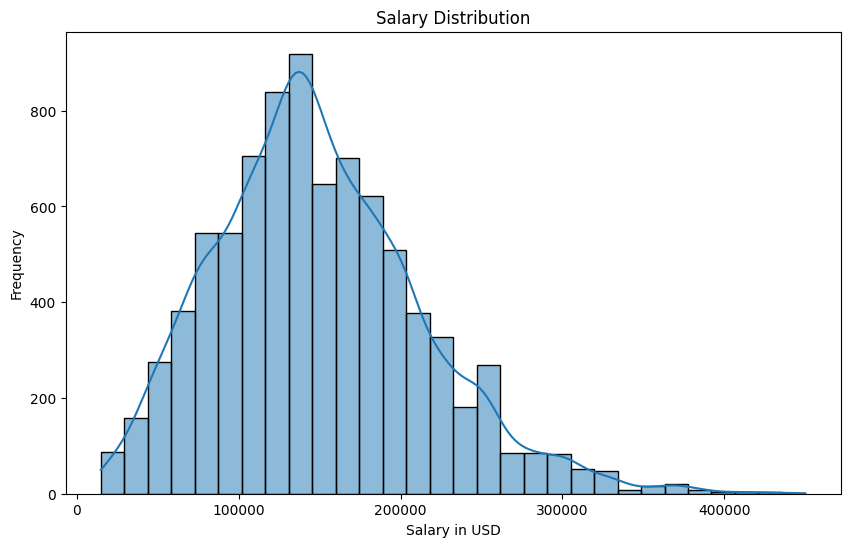

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


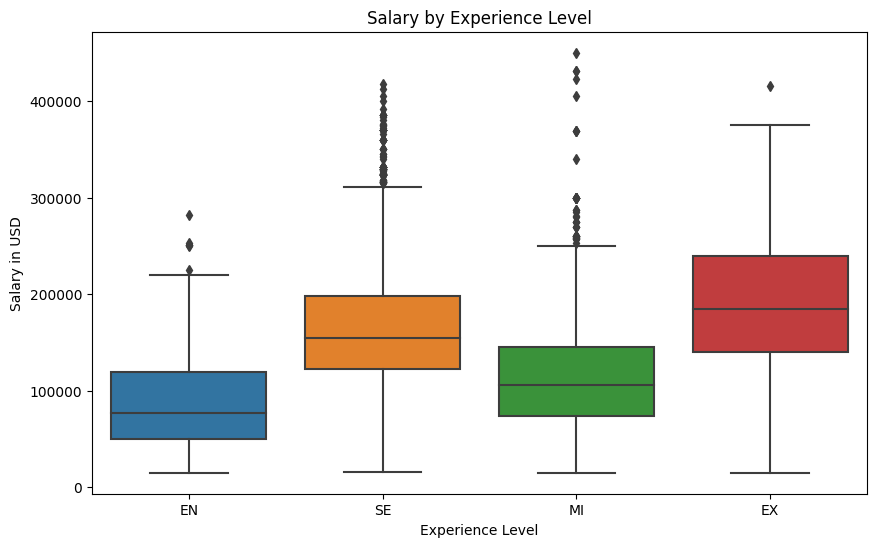

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()


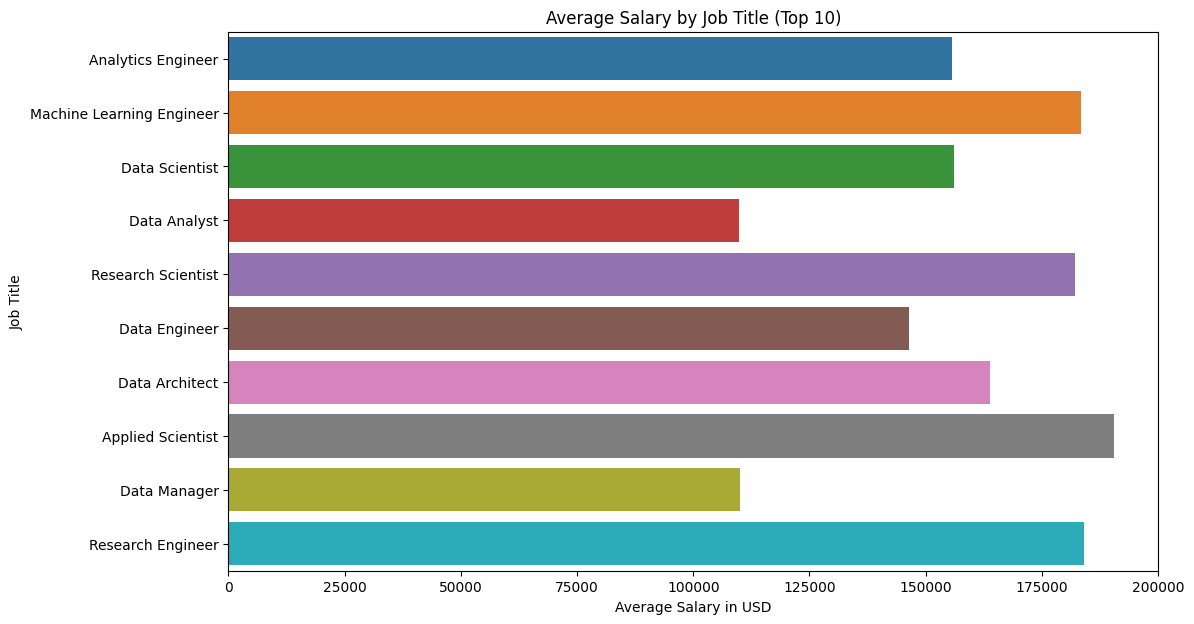

In [50]:
top_titles = data['job_title'].value_counts().index[:10]
filtered_data = data[data['job_title'].isin(top_titles)]

plt.figure(figsize=(12, 7))
sns.barplot(x='salary_in_usd', y='job_title', data=filtered_data, estimator=np.mean, ci=None)
plt.title('Average Salary by Job Title (Top 10)')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.show()


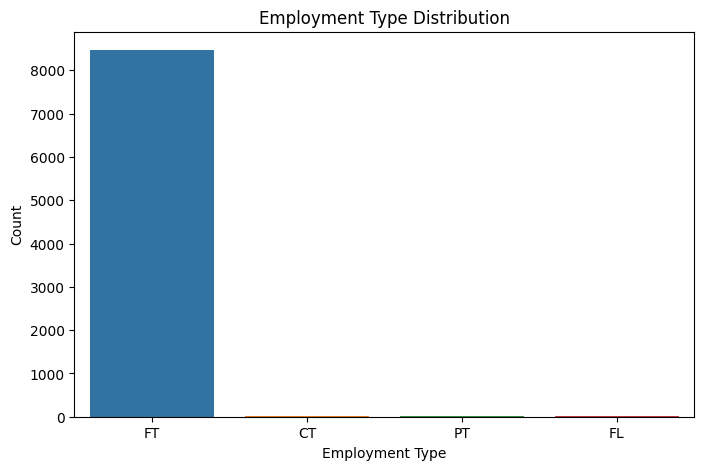

In [51]:
plt.figure(figsize=(8, 5))
sns.countplot(x='employment_type', data=data)
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()


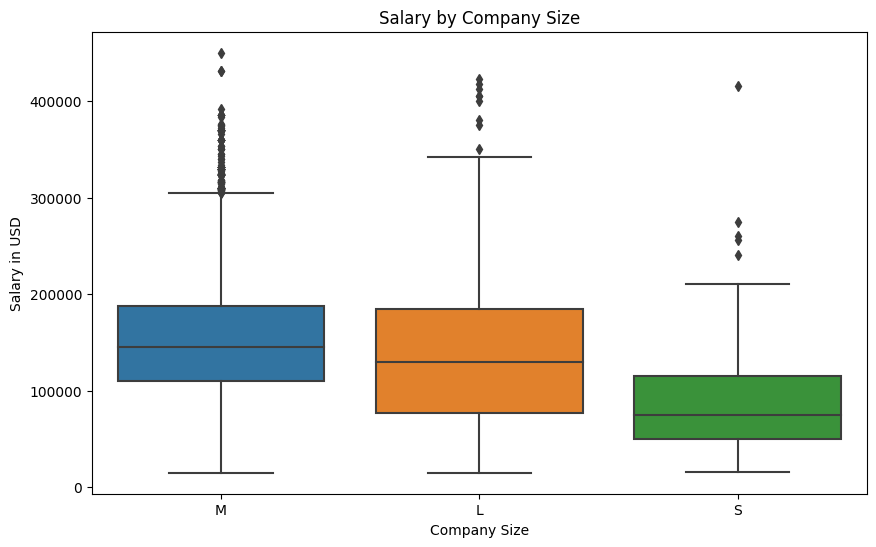

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=data)
plt.title('Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()
